In [1]:
import pandas as pd
import numpy as np 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv('/content/Dataset.csv')
df.head(2)

,Timestamp,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,2020/12/03 3:26:01 PM GMT+6,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,2020/12/03 6:25:04 PM GMT+6,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7


In [4]:
df1 = df.iloc[:,1:].copy()
print(df1)
print(df1.isnull())

    Which year are you in?  ... How long did you sleep last night?(in hours)
0                 4th year  ...                                            7
1                 4th year  ...                                            7
2                 4th year  ...                                            7
3                 4th year  ...                                            7
4                 4th year  ...                                            7
..                     ...  ...                                          ...
699               4th year  ...                                            8
700               4th year  ...                                            9
701               4th year  ...                                            8
702               4th year  ...                                           10
703               4th year  ...                                            8

[704 rows x 20 columns]
     Which year are you in?  ...  How long did you 

In [5]:
#preprocess_dataset

data = df1.to_numpy().tolist()
data

[['4th year',
  'Normal',
  50,
  'Male',
  23,
  'Home',
  'Single',
  'Yes',
  4,
  'Normal',
  'No',
  'Yes',
  'No',
  'Family',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  7],
 ['4th year',
  'Normal',
  40,
  'Male',
  23,
  'Home',
  'Single',
  'Yes',
  4,
  'Normal',
  'Yes',
  'Yes',
  'No',
  'Family',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  7],
 ['4th year',
  'Bad',
  50,
  'Male',
  23,
  'Home',
  'Single',
  'Yes',
  4,
  'Normal',
  'Yes',
  'Yes',
  'No',
  'Family',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  7],
 ['4th year',
  'Normal',
  45,
  'Male',
  23,
  'Home',
  'Single',
  'Yes',
  4,
  'Normal',
  'No',
  'Yes',
  'No',
  'Family',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  7],
 ['4th year',
  'Normal',
  50,
  'Male',
  23,
  'Home',
  'Single',
  'Yes',
  4,
  'Normal',
  'Yes',
  'Yes',
  'Yes',
  'Family',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  7],
 ['4th year',
  'Normal',
  45,
  'Male',
  23,
  'Home',
  'Single',
  'Yes',
  4,
  'Normal'

In [6]:
#convert all data to string type

for values in data:
    for i in range (len(values)):
        str1 = ''
        if type(values[i]) != str:
            str1 = str(values[i])
            values[i] = str1

tran_encoder = TransactionEncoder()

# encoding data to boolean values of array

data1 = tran_encoder.fit(data).transform(data)
print(data1)

[[False False False ... False  True False]
 [False False False ... False  True False]
 [False False False ... False  True False]
 ...
 [False False False ...  True  True False]
 [False  True False ...  True  True False]
 [False False False ... False  True False]]


In [7]:
new_df = pd.DataFrame(data1, columns = tran_encoder.columns_)
new_df

,1,10,100,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,...,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,Bad,Department,Family,Friends,Good,Hall-Mess,Home,Male,Maybe,Neutral,No,Normal,Playground,Single,Very bad,Very good,Yes,nan
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,True,True,False,False,True,False
700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,True,True,True,False,True,True,False
701,False,False,False,Fal

In [10]:
#creating frequent itemset using apriori

frequent_item = apriori(new_df, min_support= 0.5, use_colnames= True)
print(frequent_item)

      support                                       itemsets
0    1.000000                                           (23)
1    1.000000                                     (4th year)
2    0.502841                                       (Family)
3    0.546875                                         (Good)
4    1.000000                                         (Male)
..        ...                                            ...
218  0.539773            (23, Male, Yes, Normal, Single, No)
219  0.541193        (Male, Yes, Good, Single, 4th year, No)
220  0.539773      (Male, Yes, Single, Normal, 4th year, No)
221  0.541193    (23, Male, Yes, Good, Single, 4th year, No)
222  0.539773  (23, Male, Yes, Normal, Single, 4th year, No)

[223 rows x 2 columns]


In [33]:
#generating rule using association rule mining 

result = association_rules(frequent_item, metric= 'confidence', min_threshold= 0.8)
rules = result.loc[:, ['antecedents', 'consequents', 'support', 'lift', 'confidence']]
print(rules)

             antecedents  ... confidence
0             (4th year)  ...   1.000000
1                   (23)  ...   1.000000
2               (Family)  ...   1.000000
3                 (Good)  ...   1.000000
4                   (23)  ...   1.000000
...                  ...  ...        ...
2138       (Normal, Yes)  ...   0.994764
2139    (Single, Normal)  ...   0.994764
2140  (4th year, Normal)  ...   0.994764
2141        (Normal, No)  ...   1.000000
2142            (Normal)  ...   0.994764

[2143 rows x 5 columns]


In [34]:
rules.describe()

,support,lift,confidence
count,2143.000000,2143.000000,2143.000000
mean,0.665302,0.999838,0.997529
std,0.206460,0.001272,0.003770
min,0.502841,0.996689,0.989610
25%,0.539773,1.000000,0.994764
50%,0.541193,1.000000,1.000000
75%,0.992898,1.000000,1.000000
max,1.000000,1.001880,1.000000


In [35]:
z = rules['support'].min()
print('minimum support value:', z)

z1 = rules['support'].max()
print('maximum suport value:', z1)

print ('-------------------------------------------')

z2 = rules['confidence'].min()
print('minimum value of confidence:', z2)

z3 = rules['confidence'].max()
print('maximum value of confidence:', z3)

print ('-------------------------------------------')

index = rules.index
number_of_rows = len(index)

print('total number of rules being generated is:', number_of_rows)


minimum support value: 0.5028409090909091
maximum suport value: 1.0
-------------------------------------------
minimum value of confidence: 0.9896103896103895
maximum value of confidence: 1.0
-------------------------------------------
total number of rules being generated is: 2143


In [36]:
sc = result.loc[:, ['support', 'confidence']]

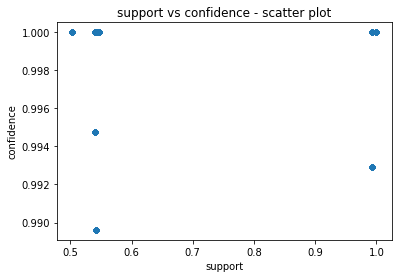

In [37]:
import matplotlib.pyplot as plt

sc.plot.scatter(x = 'support', y = 'confidence', alpha = 0.5)
plt.title('support vs confidence - scatter plot')
plt.show()


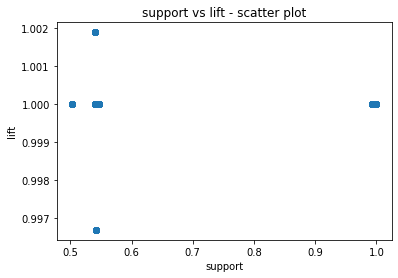

In [38]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('support vs lift - scatter plot')
plt.show()

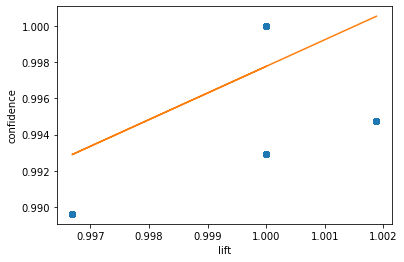

In [56]:
fit = np.polyfit( rules['lift'],rules['confidence'] ,1)
fit1 = np.poly1d(fit)
plt.xlabel('lift')
plt.ylabel('confidence')

plt.plot(rules['lift'], rules['confidence'],'o', rules['lift'], fit1(rules['lift']))